# Markdown Cell Example 
markdown can be readibly interleaved and dispersed between code in notebooks 
## Explanation of code below
The histogram (x-axis) binned readability score, (y-axis) counts of papers that occupy that readability score. 

The histogram is initially populated exclusively by the ART corpus, but the idea was every time a new author got scraped from scholar, it would be added in, such that with each persons new search our big picture of science readability would be better informed.

So the histogram changes a little modestly perceptible amount with the author scrape, but three dots pertaining to the authors easiest read, hardest read, and mean read where added.

Think of it as a bit like snapping something to a grid in photoshop.

It should be easy to hack this code to run off a local machine, using sudo.
Set up the Environment. This is now done in requirements, and the postBuild script.
```python
!pip install matplotlib
!pip install pandas
!pip install seaborn

if os.path.exists('traingDats.p?dl=0'):
    pass

else:
    !wget https://www.dropbox.com/s/3h12l5y2pn49c80/traingDats.p?dl=0
    !wget https://www.dropbox.com/s/crarli3772rf3lj/more_authors_results.p?dl=0
    !wget https://www.dropbox.com/s/x66zf52himmp5ox/benchmarks.p?dl=0
```

In [4]:
#!pip install tabulate
import pickle

import pickle
import copy
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import plotly as py


import matplotlib.pyplot as plt
try:
    [aaa,aab,_,_,all_authors] = pickle.load(open('competition_data.p','rb'))

except:
    [aaa,aab,_,_,all_authors] = pickle.load(open('competition_data.p?dl=0','rb'))

#    !wget https://www.dropbox.com/s/04nd2ww4vg4jzt6/competition_data.p?dl=0
#    !mv competition_data.p?dl=0 pickles
#    [aaa,aab,_,_,all_authors] = pickle.load(open('pickles/competition_data.p?dl=0','rb'))
    

#import glob
#files = glob.glob("*.p")
discontents = pickle.load(open("_author_specificS S Phatak.p","rb"))
df = discontents[0]
ar = discontents[2]
np.mean(df['standard'])


16.125

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been repl

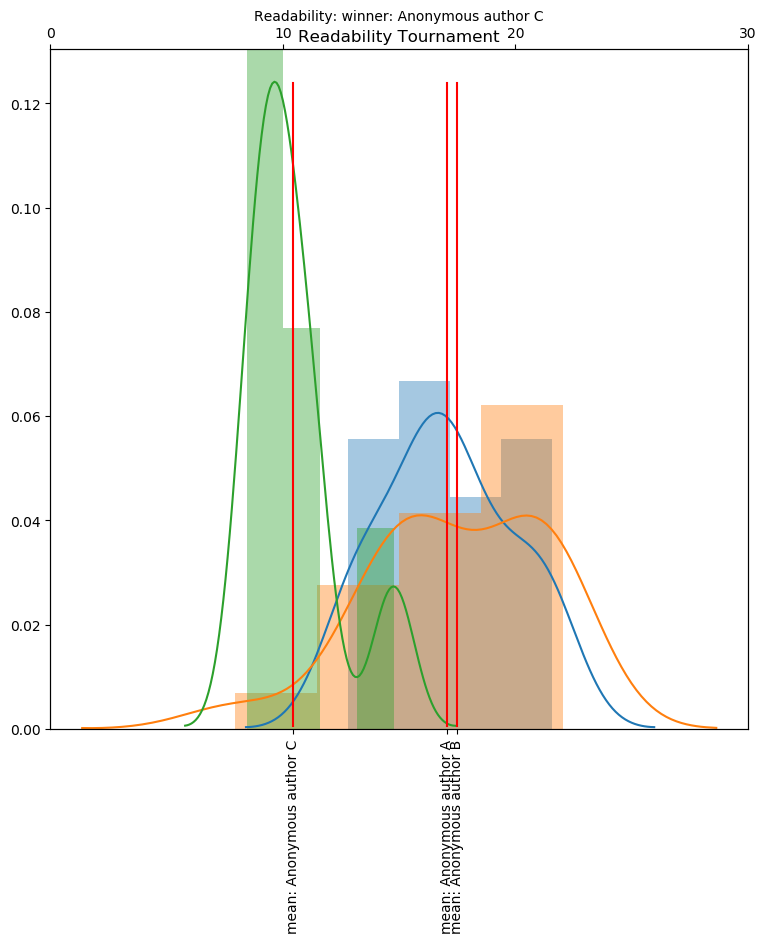

In [8]:
fig = plt.figure(figsize=(9, 9), dpi=100)
ax1 = fig.add_subplot(111)#)
#g = sns.distplot(standard_sci, label="Readability Index")
stdaaa = [r['standard'] for r in aaa]
stdaab = [r['standard'] for r in aab]
stdaac = list(df['standard'])


g = sns.distplot(stdaaa, label="Readability Index")
g = sns.distplot(stdaab, label="Readability Index")
g = sns.distplot(stdaac, label="Readability Index")

#g = sns.distplot(stdgn, label="Readability Index")
len(aab)
plt.axvline(np.mean(stdaaa), 0.004,0.95,c='r')
plt.axvline(np.mean(stdaab), 0.004,0.95,c='r')
plt.axvline(np.mean(stdaac), 0.004,0.95,c='r')

ax2 = plt.twiny()
xticks = list(range(0,40,10))


xinterval = [np.mean(stdaaa),np.mean(stdaab),np.mean(stdaac)]

ax1.set_xticks(xinterval)
ax2.set_xticks(xticks)



ax1.set_xticklabels(['mean: Anonymous author A','mean: Anonymous author B', 'mean: Anonymous author C'], minor=False, rotation=90)
#ax1.set_xticklabels([], minor=True, rotation=0)
plt.title('Readability Tournament')
plt.xlabel('Readability: winner: Anonymous author C')
plt.ylabel('Proportion of texts with this readability metric')
plt.show()

In [ ]:

def metricss(rg):
    if isinstance(rg,list):
        pub_count = len(rg)
        standard = np.mean([ r['standard'] for r in rg ])
        return standard
    else:
        return None
def metricsp(rg):
    if isinstance(rg,list):
        pub_count = len(rg)
        penalty = np.mean([ r['penalty'] for r in rg ])
        stds = np.std([ r['penalty'] for r in rg ])

        #penalty = np.mean([ r['perplexity'] for r in rg ])

        return stds
    else:
        return None

def filter_empty(the_list):
    the_list = [ tl for tl in the_list if tl is not None ]
    return [ tl for tl in the_list if 'standard' in tl.keys() ]


anonymousA = metricss(aaA)
anonymousB = metricss(aaB)
anonymousC = metricss(aaC)

rank = [(anonymousB,str('rick')),(anonymousA,str('anonymous')),(anonymousC,str('grayden'))]
print('the winner of the science clarity competition is: ', sorted(rank)[0])

ricks = metricsp(aaA)
anonymous = metricsp(aaB)
graydens = metricsp(aaC)

data_m = [{"A. Anonymous":anonymousA},{"B. Anonymous":anonymousB},{"C. Anonymous":anonymousC}]#,{"S. Baer":smbaer}]

df = pd.DataFrame(data_m)
df.T
df